In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [21]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', sep=",")
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [22]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1460


# Обработка пропусков в данных

## Обработка пропусков в числовых данных

In [40]:
null_cols = []
for col in data.columns:
    #колво пустых значених
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        null_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка LotFrontage. Тип данных float64. Количество пустых значений 259, 17.74%.
Колонка MasVnrArea. Тип данных float64. Количество пустых значений 8, 0.55%.
Колонка GarageYrBlt. Тип данных float64. Количество пустых значений 81, 5.55%.


In [26]:
# Фильтр по колонкам с пропущенными значениями

data_null = data[null_cols]
data_null

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


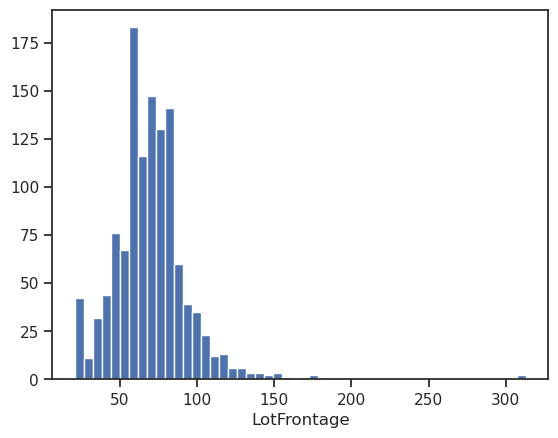

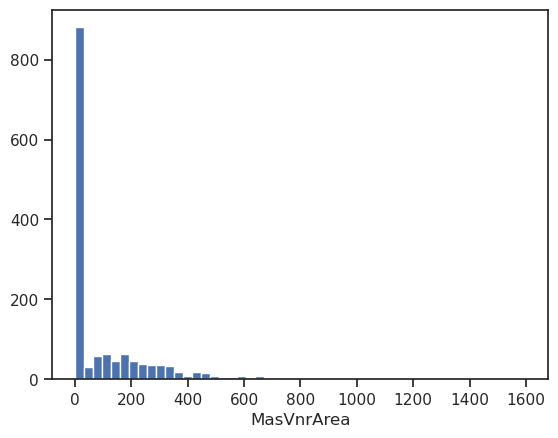

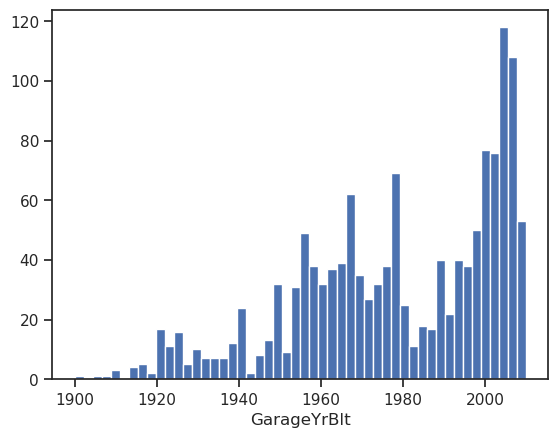

In [27]:
# Гистограмма по признакам
for col in data_null:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [28]:
data_null_MasVnrArea = data_null[['MasVnrArea']]
data_null_MasVnrArea.head()

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [30]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_null_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [31]:
strategies=['mean', 'median', 'most_frequent']

In [32]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_null_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [39]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([103.68526171, 103.68526171, 103.68526171, 103.68526171,
        103.68526171, 103.68526171, 103.68526171, 103.68526171]))

In [36]:
strategies[1], test_num_impute(strategies[1])

('median', array([0., 0., 0., 0., 0., 0., 0., 0.]))

In [37]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([0., 0., 0., 0., 0., 0., 0., 0.]))

In [42]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [38]:
data[['GarageYrBlt']].describe()

,GarageYrBlt
count,1379.000000
mean,1978.506164
std,24.689725
min,1900.000000
25%,1961.000000
50%,1980.000000
75%,2002.000000
max,2010.000000


In [43]:
test_num_impute_col(data, 'GarageYrBlt', strategies[0])

('GarageYrBlt', 'mean', 81, 1978.5061638868744, 1978.5061638868744)

In [44]:
test_num_impute_col(data, 'GarageYrBlt', strategies[1])

('GarageYrBlt', 'median', 81, 1980.0, 1980.0)

In [45]:
test_num_impute_col(data, 'GarageYrBlt', strategies[2])

('GarageYrBlt', 'most_frequent', 81, 2005.0, 2005.0)

In [47]:
data[['LotFrontage']].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


In [48]:
test_num_impute_col(data, 'LotFrontage', strategies[0])

('LotFrontage', 'mean', 259, 70.04995836802665, 70.04995836802665)

In [49]:
test_num_impute_col(data, 'LotFrontage', strategies[1])

('LotFrontage', 'median', 259, 69.0, 69.0)

In [50]:
test_num_impute_col(data, 'LotFrontage', strategies[2])

('LotFrontage', 'most_frequent', 259, 60.0, 60.0)

# Обработка пропусков в категориальных признаках

In [51]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Alley. Тип данных object. Количество пустых значений 1369, 93.77%.
Колонка MasVnrType. Тип данных object. Количество пустых значений 8, 0.55%.
Колонка BsmtQual. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtCond. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtExposure. Тип данных object. Количество пустых значений 38, 2.6%.
Колонка BsmtFinType1. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtFinType2. Тип данных object. Количество пустых значений 38, 2.6%.
Колонка Electrical. Тип данных object. Количество пустых значений 1, 0.07%.
Колонка FireplaceQu. Тип данных object. Количество пустых значений 690, 47.26%.
Колонка GarageType. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageFinish. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageQual. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageCond. Тип данных object. Количество пустых значений 81, 5.55%

In [52]:
cat_temp_data = data[['MasVnrType']]
cat_temp_data.head()

,MasVnrType
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace


In [58]:
cat_temp_data.head()

,MasVnrType
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace


In [59]:
cat_temp_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [63]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['BrkFace'],
       ['None'],
       ['BrkFace'],
       ...,
       ['None'],
       ['None'],
       ['None']], dtype=object)

In [64]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

# Кодирование категориальных признаков числовыми

In [65]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace
...,...
1455,None
1456,Stone
1457,None
1458,None


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
cat_enc['c1'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [69]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [70]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

In [71]:
cat_enc_le

array([1, 2, 1, ..., 2, 2, 2])

In [72]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

# Масштабирование данных

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [76]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['SalePrice']])

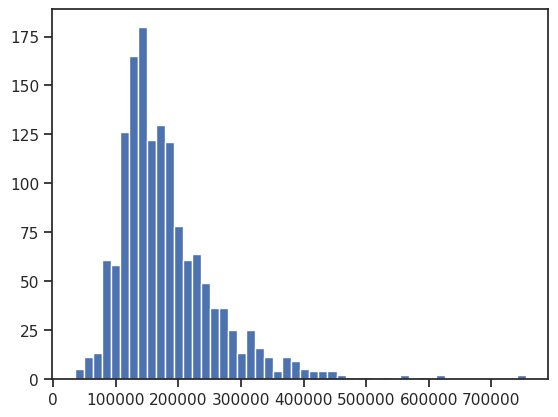

In [77]:
plt.hist(data['SalePrice'], 50)
plt.show()

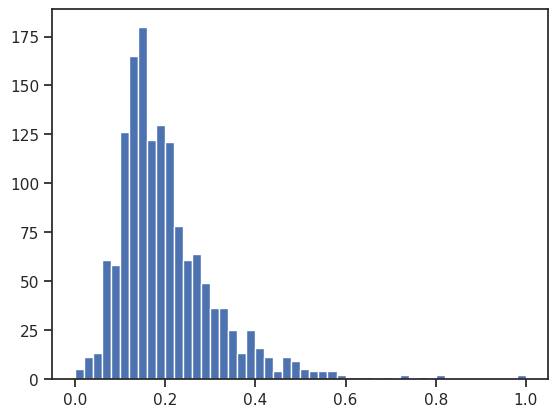

In [78]:
plt.hist(sc1_data, 50)
plt.show()